<a href="https://colab.research.google.com/github/AyodoS0815/ICDS-Apr/blob/main/CPSTNOnlineFood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-------------
#**Online** **Food** **Orders**
##Problem statement:
- Can we predict customer feedback (Positive or Negative) on online food orders based on demographic, geographic, and socio-economic factors?
-------------

##Research questions:
- How do demographic factors such as age, gender, and marital status influence customer feedback?
- Does the customer's monthly income and educational qualifications significantly impact the likelihood of giving positive feedback?
- Can geographic factors such as location(longitude, latitude) help predict customer feedback?
-------------

##*Data* *Exploration*(*EDA*)

In [32]:
#import necessary libraries and load the dataset in question
import pandas as pd
import matplotlib.pyplot as plt
import folium
import seaborn as sns
import numpy as np


data = pd.read_csv("/content/drive/MyDrive/CSV/onlinefoods.csv")
data

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [34]:
data.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


In [35]:
#Data cleaning
data.isnull().sum()

,0
Age,0
Gender,0
Marital Status,0
Occupation,0
Monthly Income,0
Educational Qualifications,0
Family size,0
latitude,0
longitude,0
Pin code,0


In [36]:
#Drop unwanted columns
data.drop(columns=['Pin code', 'Output','Unnamed: 12'], axis=1, inplace=True)
data

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,Negative
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,Positive
...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,Positive
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,Positive
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,Positive
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,Positive


In [37]:
#Find and sort out categorical and numerical columns in the dataset
categorical_columns=data.select_dtypes(include='object').columns
numerical_columns = data.select_dtypes(include='number').columns

In [38]:
#Further preprocessing to ensure categorical data is consistent using the strip parameter
for col in categorical_columns:
    data[col] = data[col].str.strip()

In [39]:
#Check for duplicates in dataset
data.duplicated().sum()

103

In [40]:
#Clean up the areas where there is a '.' in the Monthly income and educational qualifications columns for better consistency in the code using the str.replace parameter
data['Monthly Income'] = data['Monthly Income'].str.replace('.', '', regex=False) #regex=False makes sure to perform this function as a string

data['Educational Qualifications'] = data['Educational Qualifications'].str.replace('.', '', regex=False)

###*Distributions*

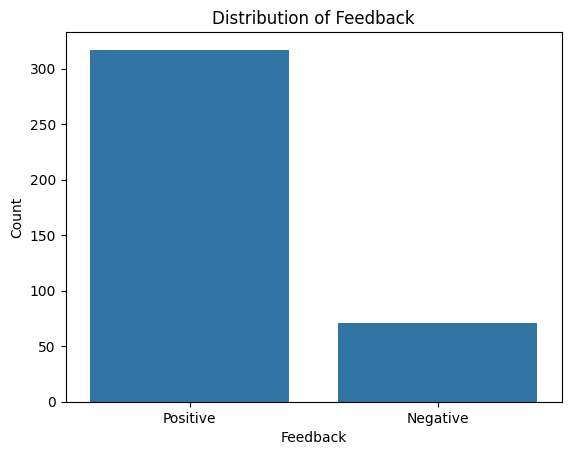

In [41]:
#Ratings distribution
sns.countplot(x='Feedback', data=data)
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.title('Distribution of Feedback')
plt.show()

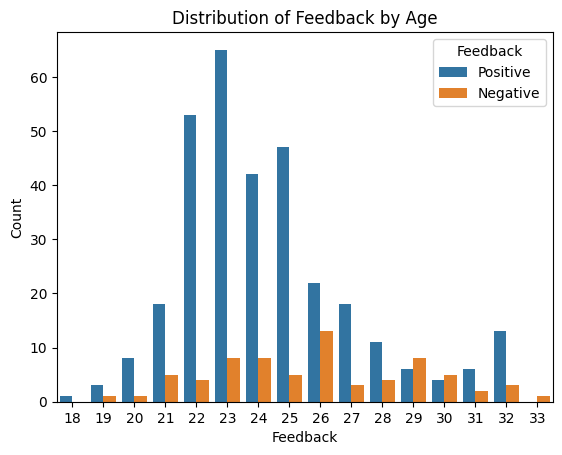

In [42]:
#Distribution of Feedback by Age
sns.countplot(x='Age', hue='Feedback', data=data)
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.title('Distribution of Feedback by Age')
plt.show()

In a nutshell, this indicates that there is a good number of positive feedback across most age groups. However, the higher number of positive feedbacks come from ages 22-25. Distribution of the visual is right skewed, longer tail toward the older individuals.

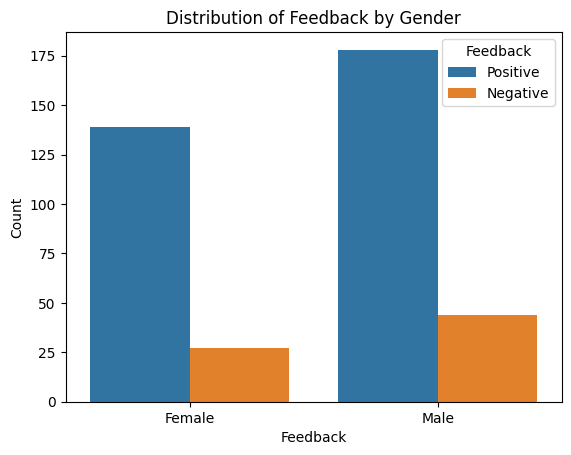

In [43]:
#Distribution of Feedback by gender
sns.countplot(x='Gender', hue='Feedback', data=data)
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.title('Distribution of Feedback by Gender')
plt.show()

Count plot above shows the distribution of feedback by gender.

Males have higher count of positive feed than females

Negative feed is low for both genders, slightly higher for males

Potential bias for males providing more feedback overall

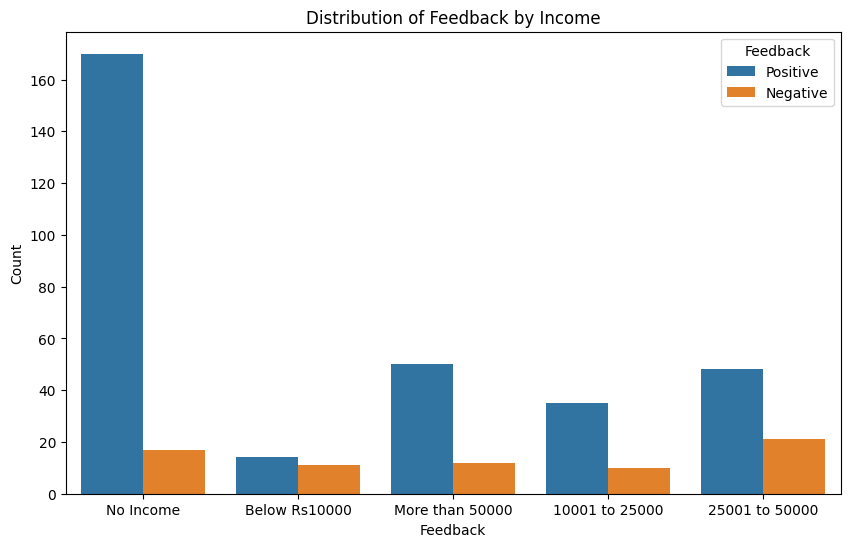

In [44]:
#Distribution of Feedback by Income
plt.figure(figsize=(10, 6))
sns.countplot(x='Monthly Income', hue='Feedback', data=data)
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.title('Distribution of Feedback by Income')
plt.show()

Count plot indicates the relationship between income levels and frequency of positive and negative feedback.

Higher positive feedback in the No Income group

Negative feedback distribution is relatively consistent across all income levels

Location Analysis

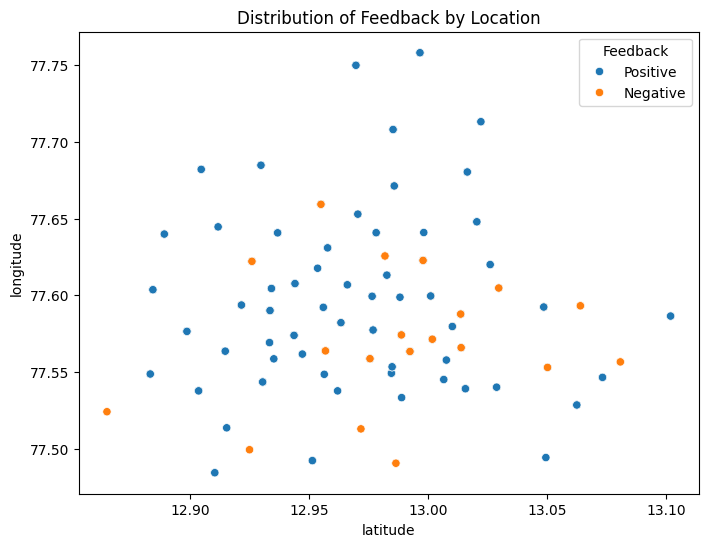

In [46]:
#Distribution of Feedback by location(longitude, latitude)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='latitude', y='longitude', hue='Feedback', data=data)
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.title('Distribution of Feedback by Location')
plt.show()

The scatter graph shows distribution of feedback by location, using longitude and latitude coordinates.

In [47]:
import numpy as np

# Example list of coordinates
latitude = ['12.9766', '12.977', '12.9551', '12.9473', '12.985', '12.9299',
        '12.977', '12.9828', '12.9766', '12.9854', '12.985', '12.977',
        '12.8988', '12.977', '12.9438', '12.8893', '12.9783', '12.982',
        '12.8988', '12.9783', '12.977', '13.0298', '12.9983', '12.9925',
        '12.9306', '12.982', '12.9353', '12.9155', '12.9854', '13.0019',
        '12.9698', '12.9783', '12.9261', '12.985', '12.9119', '12.9306',
        '12.977', '12.982', '12.9438', '12.8988', '12.9662', '12.9565',
        '12.9925', '12.985', '12.985', '12.9261', '12.977', '12.977',
        '12.982', '12.985', '13.0206', '12.977', '12.977', '12.9635',
        '12.9306', '13.0067', '12.8845', '12.977', '12.9119', '13.0067',
        '12.8988', '12.8845', '13.0158', '12.9343', '13.0019', '13.0012',
        '12.9442', '13.0487', '13.0487', '12.9438', '12.9889', '12.9335',
        '12.9766', '12.8845', '13.0019', '13.102', '12.9048', '12.977',
        '12.977', '12.9337', '12.9037', '12.977', '12.9343', '12.9438',
        '12.977', '12.9783', '12.9337', '12.977', '12.977', '13.0289',
        '13.0289', '12.9698', '12.977', '12.977', '12.9561', '12.977',
        '13.0206', '13.0206', '12.9579', '13.014', '12.9335', '12.9442',
        '12.9698', '12.9438', '12.9261', '12.9698', '12.9698', '12.9343',
        '12.9698', '12.9635', '12.977', '12.9343', '12.9925', '13.0206',
        '12.985', '12.9551', '13.0289', '13.0138', '12.9261', '12.9766',
        '12.9766', '12.9766', '12.9635', '12.9635', '12.9635', '12.9635',
        '12.977', '12.977', '12.977', '13.0487', '13.0019', '13.0019',
        '13.0019', '13.0019', '12.9537', '12.9698', '12.998', '12.998',
        '12.998', '12.9343', '13.102', '13.0158', '12.998', '12.998',
        '13.0138', '13.0138', '12.977', '13.0496', '12.9783', '12.9889',
        '12.977', '13.0487', '12.9579', '12.9579', '12.9579', '13.0487',
        '12.985', '12.985', '12.985', '12.9337', '12.9337', '12.9337',
        '13.0166', '13.014', '13.014', '13.0503', '13.0503', '12.9883',
        '13.0626', '13.0626', '13.0626', '13.0166', '13.0166', '12.9551',
        '12.9551', '12.9551', '12.957', '12.957', '12.957', '12.957',
        '12.957', '12.8652', '12.9698', '12.9889', '12.9889', '12.9925',
        '12.977', '12.9757', '12.9757', '13.0487', '13.0487', '12.9662',
        '12.9662', '12.9343', '12.9343', '12.9343', '12.9442', '12.9442',
        '12.9442', '13.0298', '12.9261', '12.9621', '12.8845', '12.9048',
        '12.9048', '12.9261', '12.9261', '12.977', '12.9783', '12.9783',
        '12.9217', '13.0206', '13.0012', '13.0223', '12.9337', '12.982',
        '13.0262', '12.9217', '13.0078', '13.0078', '12.9217', '12.9105',
        '12.9105', '12.9037', '12.8834', '12.9149', '12.9149', '12.9706',
        '12.9706', '12.9706', '12.8845', '12.9783', '13.0103', '13.0103',
        '12.9306', '13.0641', '13.0158', '12.9561', '12.8845', '12.9369',
        '12.9369', '12.9369', '12.9369', '13.0158', '13.0809', '13.0641',
        '12.9859', '12.9859', '12.9866', '12.9847', '12.9847', '12.9847',
        '12.9299', '12.9299', '12.9828', '12.989', '12.977', '12.9251',
        '12.9967', '12.9967', '12.9967', '12.957', '12.957', '12.9889',
        '13.0206', '12.8893', '12.8893', '12.9967', '12.9783', '12.9783',
        '12.9925', '12.9925', '12.9561', '12.9561', '13.0734', '13.0487',
        '12.9515', '12.9515', '12.9719', '12.9048', '12.9048', '13.0103',
        '13.0103', '12.8893', '12.9828', '12.9757', '12.9757', '12.9757',
        '13.0734', '13.0734', '13.0734', '13.0626', '13.0626', '12.977',
        '12.998', '13.0626', '13.0626', '13.0138', '13.0138', '13.014',
        '12.9551', '12.9473', '12.985', '12.9299', '12.977', '12.9828',
        '12.9766', '12.9854', '12.985', '12.977', '12.9037', '12.8834',
        '12.9149', '12.9149', '12.9706', '12.9706', '12.9706', '12.8845',
        '12.9783', '13.0103', '13.0103', '12.9306', '13.0641', '13.0158',
        '12.9561', '12.8845', '12.9369', '12.9369', '12.9369', '12.8845',
        '12.9048', '12.9048', '12.9261', '12.9261', '12.977', '12.9783',
        '12.9783', '12.9217', '13.0206', '13.0012', '13.0223', '12.9337',
        '12.982', '13.0262', '12.9217', '12.8845', '12.9048', '12.9048',
        '12.9261', '12.9261', '12.977', '12.9783', '12.9783', '12.9217',
        '13.0206', '13.0012', '12.9706', '12.9706', '12.9706', '12.8845',
        '12.9783', '13.0103', '13.0103', '12.9306', '13.0641', '13.0158',
        '12.9561', '12.8845', '12.9369', '12.9369', '12.9369', '12.9369',
        '13.0158', '13.0809', '13.0641', '12.9859', '12.9859', '12.9866',
        '12.9847', '12.985', '12.9299', '12.977', '12.9828', '12.9766',
        '12.9854', '12.985', '12.977', '12.8988']
longitude = ['77.5993', '77.5773', '77.6593', '77.5616', '77.5533', '77.6848',
        '77.5773', '77.6131', '77.5993', '77.7081', '77.5533', '77.5773',
        '77.5764', '77.5773', '77.5738', '77.6399', '77.6408', '77.6256',
        '77.5764', '77.6408', '77.5773', '77.6047', '77.6409', '77.5633',
        '77.5434', '77.6256', '77.5585', '77.5135', '77.7081', '77.5713',
        '77.75', '77.6408', '77.6221', '77.5533', '77.6446', '77.5434',
        '77.5773', '77.6256', '77.5738', '77.5764', '77.6068', '77.5484',
        '77.5633', '77.5533', '77.5533', '77.6221', '77.5773', '77.5773',
        '77.6256', '77.5533', '77.6479', '77.5773', '77.5773', '77.5821',
        '77.5434', '77.545', '77.6036', '77.5773', '77.6446', '77.545',
        '77.5764', '77.6036', '77.539', '77.6044', '77.5713', '77.5995',
        '77.6076', '77.5923', '77.5923', '77.5738', '77.5741', '77.5691',
        '77.5993', '77.6036', '77.5713', '77.5864', '77.6821', '77.5773',
        '77.5773', '77.59', '77.5376', '77.5773', '77.6044', '77.5738',
        '77.5773', '77.6408', '77.59', '77.5773', '77.5773', '77.54',
        '77.54', '77.75', '77.5773', '77.5773', '77.5921', '77.5773',
        '77.6479', '77.6479', '77.6309', '77.5658', '77.5691', '77.6076',
        '77.75', '77.5738', '77.6221', '77.75', '77.75', '77.6044',
        '77.75', '77.5821', '77.5773', '77.6044', '77.5633', '77.6479',
        '77.5533', '77.6593', '77.54', '77.5877', '77.6221', '77.5993',
        '77.5993', '77.5993', '77.5821', '77.5821', '77.5821', '77.5821',
        '77.5773', '77.5773', '77.5773', '77.5923', '77.5713', '77.5713',
        '77.5713', '77.5713', '77.6176', '77.75', '77.6227', '77.6227',
        '77.6227', '77.6044', '77.5864', '77.539', '77.6227', '77.6227',
        '77.5877', '77.5877', '77.5773', '77.4941', '77.6408', '77.5741',
        '77.5773', '77.5923', '77.6309', '77.6309', '77.6309', '77.5923',
        '77.5533', '77.5533', '77.5533', '77.59', '77.59', '77.59',
        '77.6804', '77.5658', '77.5658', '77.5529', '77.5529', '77.5987',
        '77.5284', '77.5284', '77.5284', '77.6804', '77.6804', '77.6593',
        '77.6593', '77.6593', '77.5637', '77.5637', '77.5637', '77.5637',
        '77.5637', '77.524', '77.75', '77.5741', '77.5741', '77.5633',
        '77.5773', '77.5586', '77.5586', '77.5923', '77.5923', '77.6068',
        '77.6068', '77.6044', '77.6044', '77.6044', '77.6076', '77.6076',
        '77.6076', '77.6047', '77.6221', '77.5376', '77.6036', '77.6821',
        '77.6821', '77.6221', '77.6221', '77.5773', '77.6408', '77.6408',
        '77.5936', '77.6479', '77.5995', '77.7132', '77.59', '77.6256',
        '77.62', '77.5936', '77.5577', '77.5577', '77.5936', '77.4842',
        '77.4842', '77.5376', '77.5486', '77.5635', '77.5635', '77.6529',
        '77.6529', '77.6529', '77.6036', '77.6408', '77.5796', '77.5796',
        '77.5434', '77.5931', '77.539', '77.5921', '77.6036', '77.6407',
        '77.6407', '77.6407', '77.6407', '77.539', '77.5565', '77.5931',
        '77.6713', '77.6713', '77.4904', '77.5491', '77.5491', '77.5491',
        '77.6848', '77.6848', '77.6131', '77.5332', '77.5773', '77.4992',
        '77.7582', '77.7582', '77.7582', '77.5637', '77.5637', '77.5741',
        '77.6479', '77.6399', '77.6399', '77.7582', '77.6408', '77.6408',
        '77.5633', '77.5633', '77.5921', '77.5921', '77.5464', '77.5923',
        '77.4921', '77.4921', '77.5128', '77.6821', '77.6821', '77.5796',
        '77.5796', '77.6399', '77.6131', '77.5586', '77.5586', '77.5586',
        '77.5464', '77.5464', '77.5464', '77.5284', '77.5284', '77.5773',
        '77.6227', '77.5284', '77.5284', '77.5877', '77.5877', '77.5658',
        '77.6593', '77.5616', '77.5533', '77.6848', '77.5773', '77.6131',
        '77.5993', '77.7081', '77.5533', '77.5773', '77.5376', '77.5486',
        '77.5635', '77.5635', '77.6529', '77.6529', '77.6529', '77.6036',
        '77.6408', '77.5796', '77.5796', '77.5434', '77.5931', '77.539',
        '77.5921', '77.6036', '77.6407', '77.6407', '77.6407', '77.6036',
        '77.6821', '77.6821', '77.6221', '77.6221', '77.5773', '77.6408',
        '77.6408', '77.5936', '77.6479', '77.5995', '77.7132', '77.59',
        '77.6256', '77.62', '77.5936', '77.6036', '77.6821', '77.6821',
        '77.6221', '77.6221', '77.5773', '77.6408', '77.6408', '77.5936',
        '77.6479', '77.5995', '77.6529', '77.6529', '77.6529', '77.6036',
        '77.6408', '77.5796', '77.5796', '77.5434', '77.5931', '77.539',
        '77.5921', '77.6036', '77.6407', '77.6407', '77.6407', '77.6407',
        '77.539', '77.5565', '77.5931', '77.6713', '77.6713', '77.4904',
        '77.5491', '77.5533', '77.6848', '77.5773', '77.6131', '77.5993',
        '77.7081', '77.5533', '77.5773', '77.5764']

# Combine latitude and longitude into a single 2D array
coordinates = [longitude, latitude]

#Convert the list to a numpy array
array = np.array(coordinates)

#Convert the array elements to float so that it is easier to calculate and plot
numeric_array = array.astype('float')

print(numeric_array)


[[77.5993 77.5773 77.6593 77.5616 77.5533 77.6848 77.5773 77.6131 77.5993
  77.7081 77.5533 77.5773 77.5764 77.5773 77.5738 77.6399 77.6408 77.6256
  77.5764 77.6408 77.5773 77.6047 77.6409 77.5633 77.5434 77.6256 77.5585
  77.5135 77.7081 77.5713 77.75   77.6408 77.6221 77.5533 77.6446 77.5434
  77.5773 77.6256 77.5738 77.5764 77.6068 77.5484 77.5633 77.5533 77.5533
  77.6221 77.5773 77.5773 77.6256 77.5533 77.6479 77.5773 77.5773 77.5821
  77.5434 77.545  77.6036 77.5773 77.6446 77.545  77.5764 77.6036 77.539
  77.6044 77.5713 77.5995 77.6076 77.5923 77.5923 77.5738 77.5741 77.5691
  77.5993 77.6036 77.5713 77.5864 77.6821 77.5773 77.5773 77.59   77.5376
  77.5773 77.6044 77.5738 77.5773 77.6408 77.59   77.5773 77.5773 77.54
  77.54   77.75   77.5773 77.5773 77.5921 77.5773 77.6479 77.6479 77.6309
  77.5658 77.5691 77.6076 77.75   77.5738 77.6221 77.75   77.75   77.6044
  77.75   77.5821 77.5773 77.6044 77.5633 77.6479 77.5533 77.6593 77.54
  77.5877 77.6221 77.5993 77.5993 77.5993 7

In [48]:
print(type(numeric_array))

<class 'numpy.ndarray'>


In [49]:
print(numeric_array.shape)

(2, 388)


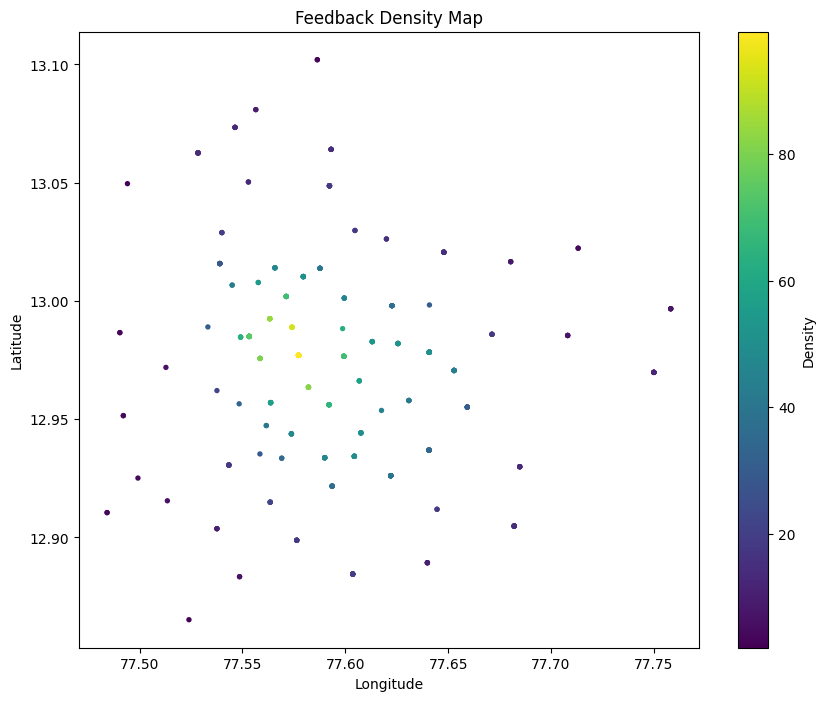

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Your latitude and longitude data as numpy arrays
longitude = np.array([
    77.5993, 77.5773, 77.6593, 77.5616, 77.5533, 77.6848, 77.5773, 77.6131, 77.5993,
  77.7081, 77.5533, 77.5773, 77.5764, 77.5773, 77.5738, 77.6399, 77.6408, 77.6256,
  77.5764, 77.6408, 77.5773, 77.6047, 77.6409, 77.5633, 77.5434, 77.6256, 77.5585,
  77.5135, 77.7081, 77.5713, 77.75,   77.6408, 77.6221, 77.5533, 77.6446, 77.5434,
  77.5773, 77.6256, 77.5738, 77.5764, 77.6068, 77.5484, 77.5633, 77.5533, 77.5533,
  77.6221, 77.5773, 77.5773, 77.6256, 77.5533, 77.6479, 77.5773, 77.5773, 77.5821,
  77.5434, 77.545,  77.6036, 77.5773, 77.6446, 77.545,  77.5764, 77.6036, 77.539,
  77.6044, 77.5713, 77.5995, 77.6076, 77.5923, 77.5923, 77.5738, 77.5741, 77.5691,
  77.5993, 77.6036, 77.5713, 77.5864, 77.6821, 77.5773, 77.5773, 77.59,   77.5376,
  77.5773, 77.6044, 77.5738, 77.5773, 77.6408, 77.59,   77.5773, 77.5773, 77.54,
  77.54,   77.75,   77.5773, 77.5773, 77.5921, 77.5773, 77.6479, 77.6479, 77.6309,
  77.5658, 77.5691, 77.6076, 77.75,   77.5738, 77.6221, 77.75,   77.75,   77.6044,
  77.75,   77.5821, 77.5773, 77.6044, 77.5633, 77.6479, 77.5533, 77.6593, 77.54,
  77.5877, 77.6221, 77.5993, 77.5993, 77.5993, 77.5821, 77.5821, 77.5821, 77.5821,
  77.5773, 77.5773, 77.5773, 77.5923, 77.5713, 77.5713, 77.5713, 77.5713, 77.6176,
  77.75,   77.6227, 77.6227, 77.6227, 77.6044, 77.5864, 77.539,  77.6227, 77.6227,
  77.5877, 77.5877, 77.5773, 77.4941, 77.6408, 77.5741, 77.5773, 77.5923, 77.6309,
  77.6309, 77.6309, 77.5923, 77.5533, 77.5533, 77.5533, 77.59,   77.59,   77.59,
  77.6804, 77.5658, 77.5658, 77.5529, 77.5529, 77.5987, 77.5284, 77.5284, 77.5284,
  77.6804, 77.6804, 77.6593, 77.6593, 77.6593, 77.5637, 77.5637, 77.5637, 77.5637,
  77.5637, 77.524,  77.75,   77.5741, 77.5741, 77.5633, 77.5773, 77.5586, 77.5586,
  77.5923, 77.5923, 77.6068, 77.6068, 77.6044, 77.6044, 77.6044, 77.6076, 77.6076,
  77.6076, 77.6047, 77.6221, 77.5376, 77.6036, 77.6821, 77.6821, 77.6221, 77.6221,
  77.5773, 77.6408, 77.6408, 77.5936, 77.6479, 77.5995, 77.7132, 77.59,   77.6256,
  77.62,   77.5936, 77.5577, 77.5577, 77.5936, 77.4842, 77.4842, 77.5376, 77.5486,
  77.5635, 77.5635, 77.6529, 77.6529, 77.6529, 77.6036, 77.6408, 77.5796, 77.5796,
  77.5434, 77.5931, 77.539,  77.5921, 77.6036, 77.6407, 77.6407, 77.6407, 77.6407,
  77.539,  77.5565, 77.5931, 77.6713, 77.6713, 77.4904, 77.5491, 77.5491, 77.5491,
  77.6848, 77.6848, 77.6131, 77.5332, 77.5773, 77.4992, 77.7582, 77.7582, 77.7582,
  77.5637, 77.5637, 77.5741, 77.6479, 77.6399, 77.6399, 77.7582, 77.6408, 77.6408,
  77.5633, 77.5633, 77.5921, 77.5921, 77.5464, 77.5923, 77.4921, 77.4921, 77.5128,
  77.6821, 77.6821, 77.5796, 77.5796, 77.6399, 77.6131, 77.5586, 77.5586, 77.5586,
  77.5464, 77.5464, 77.5464, 77.5284, 77.5284, 77.5773, 77.6227, 77.5284, 77.5284,
  77.5877, 77.5877, 77.5658, 77.6593, 77.5616, 77.5533, 77.6848, 77.5773, 77.6131,
  77.5993, 77.7081, 77.5533, 77.5773, 77.5376, 77.5486, 77.5635, 77.5635, 77.6529,
  77.6529, 77.6529, 77.6036, 77.6408, 77.5796, 77.5796, 77.5434, 77.5931, 77.539,
  77.5921, 77.6036, 77.6407, 77.6407, 77.6407, 77.6036, 77.6821, 77.6821, 77.6221,
  77.6221, 77.5773, 77.6408, 77.6408, 77.5936, 77.6479, 77.5995, 77.7132, 77.59,
  77.6256, 77.62,   77.5936, 77.6036, 77.6821, 77.6821, 77.6221, 77.6221, 77.5773,
  77.6408, 77.6408, 77.5936, 77.6479, 77.5995, 77.6529, 77.6529, 77.6529, 77.6036,
  77.6408, 77.5796, 77.5796, 77.5434, 77.5931, 77.539,  77.5921, 77.6036, 77.6407,
  77.6407, 77.6407, 77.6407, 77.539,  77.5565, 77.5931, 77.6713, 77.6713, 77.4904,
  77.5491, 77.5533, 77.6848, 77.5773, 77.6131, 77.5993, 77.7081, 77.5533, 77.5773,
  77.5764
])

latitude = np.array([
    12.9766, 12.977,  12.9551, 12.9473, 12.985,  12.9299, 12.977,  12.9828, 12.9766,
  12.9854, 12.985,  12.977,  12.8988, 12.977,  12.9438, 12.8893, 12.9783, 12.982,
  12.8988, 12.9783, 12.977,  13.0298, 12.9983, 12.9925, 12.9306, 12.982,  12.9353,
  12.9155, 12.9854, 13.0019, 12.9698, 12.9783, 12.9261, 12.985,  12.9119, 12.9306,
  12.977,  12.982,  12.9438, 12.8988, 12.9662, 12.9565, 12.9925, 12.985,  12.985,
  12.9261, 12.977,  12.977,  12.982,  12.985,  13.0206, 12.977,  12.977,  12.9635,
  12.9306, 13.0067, 12.8845, 12.977,  12.9119, 13.0067, 12.8988, 12.8845, 13.0158,
  12.9343, 13.0019, 13.0012, 12.9442, 13.0487, 13.0487, 12.9438, 12.9889, 12.9335,
  12.9766, 12.8845, 13.0019, 13.102,  12.9048, 12.977,  12.977,  12.9337, 12.9037,
  12.977,  12.9343, 12.9438, 12.977,  12.9783, 12.9337, 12.977,  12.977,  13.0289,
  13.0289, 12.9698, 12.977,  12.977,  12.9561, 12.977,  13.0206, 13.0206, 12.9579,
  13.014,  12.9335, 12.9442, 12.9698, 12.9438, 12.9261, 12.9698, 12.9698, 12.9343,
  12.9698, 12.9635, 12.977,  12.9343, 12.9925, 13.0206, 12.985,  12.9551, 13.0289,
  13.0138, 12.9261, 12.9766, 12.9766, 12.9766, 12.9635, 12.9635, 12.9635, 12.9635,
  12.977,  12.977,  12.977,  13.0487, 13.0019, 13.0019, 13.0019, 13.0019, 12.9537,
  12.9698, 12.998,  12.998,  12.998,  12.9343, 13.102,  13.0158, 12.998,  12.998,
  13.0138, 13.0138, 12.977,  13.0496, 12.9783, 12.9889, 12.977,  13.0487, 12.9579,
  12.9579, 12.9579, 13.0487, 12.985,  12.985,  12.985,  12.9337, 12.9337, 12.9337,
  13.0166, 13.014,  13.014,  13.0503, 13.0503, 12.9883, 13.0626, 13.0626, 13.0626,
  13.0166, 13.0166, 12.9551, 12.9551, 12.9551, 12.957,  12.957,  12.957,  12.957,
  12.957,  12.8652, 12.9698, 12.9889, 12.9889, 12.9925, 12.977,  12.9757, 12.9757,
  13.0487, 13.0487, 12.9662, 12.9662, 12.9343, 12.9343, 12.9343, 12.9442, 12.9442,
  12.9442, 13.0298, 12.9261, 12.9621, 12.8845, 12.9048, 12.9048, 12.9261, 12.9261,
  12.977,  12.9783, 12.9783, 12.9217, 13.0206, 13.0012, 13.0223, 12.9337, 12.982,
  13.0262, 12.9217, 13.0078, 13.0078, 12.9217, 12.9105, 12.9105, 12.9037, 12.8834,
  12.9149, 12.9149, 12.9706, 12.9706, 12.9706, 12.8845, 12.9783, 13.0103, 13.0103,
  12.9306, 13.0641, 13.0158, 12.9561, 12.8845, 12.9369, 12.9369, 12.9369, 12.9369,
  13.0158, 13.0809, 13.0641, 12.9859, 12.9859, 12.9866, 12.9847, 12.9847, 12.9847,
  12.9299, 12.9299, 12.9828, 12.989,  12.977,  12.9251, 12.9967, 12.9967, 12.9967,
  12.957,  12.957,  12.9889, 13.0206, 12.8893, 12.8893, 12.9967, 12.9783, 12.9783,
  12.9925, 12.9925, 12.9561, 12.9561, 13.0734, 13.0487, 12.9515, 12.9515, 12.9719,
  12.9048, 12.9048, 13.0103, 13.0103, 12.8893, 12.9828, 12.9757, 12.9757, 12.9757,
  13.0734, 13.0734, 13.0734, 13.0626, 13.0626, 12.977,  12.998,  13.0626, 13.0626,
  13.0138, 13.0138, 13.014,  12.9551, 12.9473, 12.985,  12.9299, 12.977,  12.9828,
  12.9766, 12.9854, 12.985,  12.977,  12.9037, 12.8834, 12.9149, 12.9149, 12.9706,
  12.9706, 12.9706, 12.8845, 12.9783, 13.0103, 13.0103, 12.9306, 13.0641, 13.0158,
  12.9561, 12.8845, 12.9369, 12.9369, 12.9369, 12.8845, 12.9048, 12.9048, 12.9261,
  12.9261, 12.977,  12.9783, 12.9783, 12.9217, 13.0206, 13.0012, 13.0223, 12.9337,
  12.982,  13.0262, 12.9217, 12.8845, 12.9048, 12.9048, 12.9261, 12.9261, 12.977,
  12.9783, 12.9783, 12.9217, 13.0206, 13.0012, 12.9706, 12.9706, 12.9706, 12.8845,
  12.9783, 13.0103, 13.0103, 12.9306, 13.0641, 13.0158, 12.9561, 12.8845, 12.9369,
  12.9369, 12.9369, 12.9369, 13.0158, 13.0809, 13.0641, 12.9859, 12.9859, 12.9866,
  12.9847, 12.985,  12.9299, 12.977,  12.9828, 12.9766, 12.9854, 12.985,  12.977,
  12.8988
])

# Combine latitude and longitude into a single 2D array
coordinates = np.vstack([longitude, latitude])

# Create KDE
kde = gaussian_kde(coordinates)
density = kde(coordinates)

# Create the density map
plt.figure(figsize=(10, 8))
plt.scatter(longitude, latitude, c=density, s=15, cmap='viridis', edgecolor='none')
plt.colorbar(label='Density')
plt.title('Feedback Density Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


Above is a further analysis of the feedback distribution using a Density map.

We can deduce that there appears to be clustering suggesting a significant number of data is concentrated in a particular area

Sparse data is seen in the lower left and upper right of the map, possibly means that there was less activity in those areas

Density gradient transitions from high density represented buy the darker shades, to low density which are the lighter shades. That being known, we can therefore say there is a decrease in feedback concentration as we move further from the central cluster.

In [51]:
#pip install contextily

In [52]:
#pip install Basemap

In [53]:
#pip install --upgrade geopandas

In [54]:
#pip install --upgrade Basemap

In [55]:
import geopandas;
print(geopandas.__version__)

0.14.4


/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


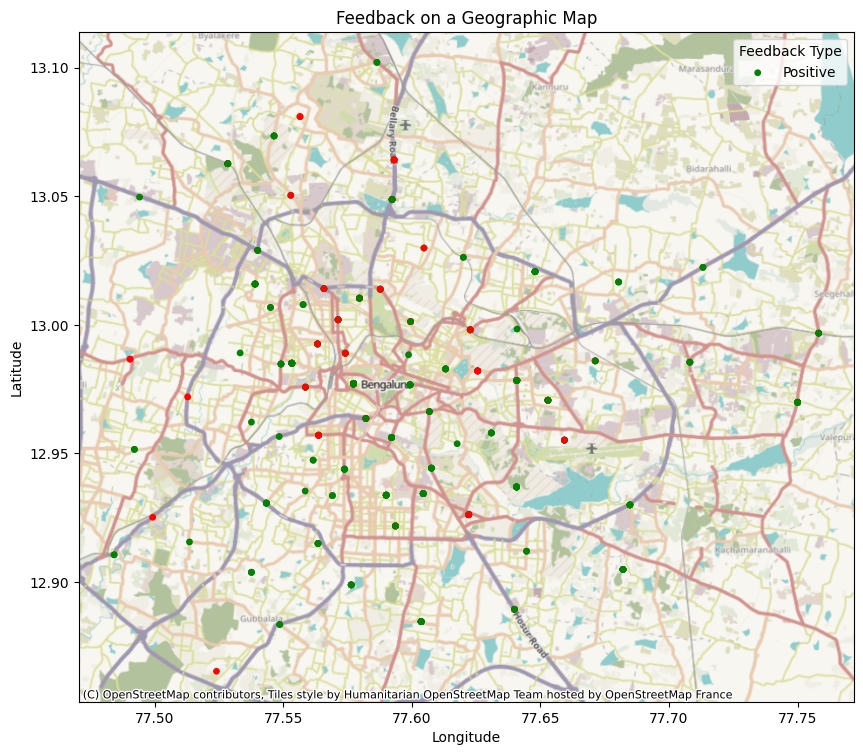

In [92]:
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import pandas as pd
import contextily as ctx
from mpl_toolkits.basemap import Basemap


# Your latitude and longitude data as numpy arrays
latitude = np.array([
    12.9766, 12.977,  12.9551, 12.9473, 12.985,  12.9299, 12.977,  12.9828, 12.9766,
  12.9854, 12.985,  12.977,  12.8988, 12.977,  12.9438, 12.8893, 12.9783, 12.982,
  12.8988, 12.9783, 12.977,  13.0298, 12.9983, 12.9925, 12.9306, 12.982,  12.9353,
  12.9155, 12.9854, 13.0019, 12.9698, 12.9783, 12.9261, 12.985,  12.9119, 12.9306,
  12.977,  12.982,  12.9438, 12.8988, 12.9662, 12.9565, 12.9925, 12.985,  12.985,
  12.9261, 12.977,  12.977,  12.982,  12.985,  13.0206, 12.977,  12.977,  12.9635,
  12.9306, 13.0067, 12.8845, 12.977,  12.9119, 13.0067, 12.8988, 12.8845, 13.0158,
  12.9343, 13.0019, 13.0012, 12.9442, 13.0487, 13.0487, 12.9438, 12.9889, 12.9335,
  12.9766, 12.8845, 13.0019, 13.102,  12.9048, 12.977,  12.977,  12.9337, 12.9037,
  12.977,  12.9343, 12.9438, 12.977,  12.9783, 12.9337, 12.977,  12.977,  13.0289,
  13.0289, 12.9698, 12.977,  12.977,  12.9561, 12.977,  13.0206, 13.0206, 12.9579,
  13.014,  12.9335, 12.9442, 12.9698, 12.9438, 12.9261, 12.9698, 12.9698, 12.9343,
  12.9698, 12.9635, 12.977,  12.9343, 12.9925, 13.0206, 12.985,  12.9551, 13.0289,
  13.0138, 12.9261, 12.9766, 12.9766, 12.9766, 12.9635, 12.9635, 12.9635, 12.9635,
  12.977,  12.977,  12.977,  13.0487, 13.0019, 13.0019, 13.0019, 13.0019, 12.9537,
  12.9698, 12.998,  12.998,  12.998,  12.9343, 13.102,  13.0158, 12.998,  12.998,
  13.0138, 13.0138, 12.977,  13.0496, 12.9783, 12.9889, 12.977,  13.0487, 12.9579,
  12.9579, 12.9579, 13.0487, 12.985,  12.985,  12.985,  12.9337, 12.9337, 12.9337,
  13.0166, 13.014,  13.014,  13.0503, 13.0503, 12.9883, 13.0626, 13.0626, 13.0626,
  13.0166, 13.0166, 12.9551, 12.9551, 12.9551, 12.957,  12.957,  12.957,  12.957,
  12.957,  12.8652, 12.9698, 12.9889, 12.9889, 12.9925, 12.977,  12.9757, 12.9757,
  13.0487, 13.0487, 12.9662, 12.9662, 12.9343, 12.9343, 12.9343, 12.9442, 12.9442,
  12.9442, 13.0298, 12.9261, 12.9621, 12.8845, 12.9048, 12.9048, 12.9261, 12.9261,
  12.977,  12.9783, 12.9783, 12.9217, 13.0206, 13.0012, 13.0223, 12.9337, 12.982,
  13.0262, 12.9217, 13.0078, 13.0078, 12.9217, 12.9105, 12.9105, 12.9037, 12.8834,
  12.9149, 12.9149, 12.9706, 12.9706, 12.9706, 12.8845, 12.9783, 13.0103, 13.0103,
  12.9306, 13.0641, 13.0158, 12.9561, 12.8845, 12.9369, 12.9369, 12.9369, 12.9369,
  13.0158, 13.0809, 13.0641, 12.9859, 12.9859, 12.9866, 12.9847, 12.9847, 12.9847,
  12.9299, 12.9299, 12.9828, 12.989,  12.977,  12.9251, 12.9967, 12.9967, 12.9967,
  12.957,  12.957,  12.9889, 13.0206, 12.8893, 12.8893, 12.9967, 12.9783, 12.9783,
  12.9925, 12.9925, 12.9561, 12.9561, 13.0734, 13.0487, 12.9515, 12.9515, 12.9719,
  12.9048, 12.9048, 13.0103, 13.0103, 12.8893, 12.9828, 12.9757, 12.9757, 12.9757,
  13.0734, 13.0734, 13.0734, 13.0626, 13.0626, 12.977,  12.998,  13.0626, 13.0626,
  13.0138, 13.0138, 13.014,  12.9551, 12.9473, 12.985,  12.9299, 12.977,  12.9828,
  12.9766, 12.9854, 12.985,  12.977,  12.9037, 12.8834, 12.9149, 12.9149, 12.9706,
  12.9706, 12.9706, 12.8845, 12.9783, 13.0103, 13.0103, 12.9306, 13.0641, 13.0158,
  12.9561, 12.8845, 12.9369, 12.9369, 12.9369, 12.8845, 12.9048, 12.9048, 12.9261,
  12.9261, 12.977,  12.9783, 12.9783, 12.9217, 13.0206, 13.0012, 13.0223, 12.9337,
  12.982,  13.0262, 12.9217, 12.8845, 12.9048, 12.9048, 12.9261, 12.9261, 12.977,
  12.9783, 12.9783, 12.9217, 13.0206, 13.0012, 12.9706, 12.9706, 12.9706, 12.8845,
  12.9783, 13.0103, 13.0103, 12.9306, 13.0641, 13.0158, 12.9561, 12.8845, 12.9369,
  12.9369, 12.9369, 12.9369, 13.0158, 13.0809, 13.0641, 12.9859, 12.9859, 12.9866,
  12.9847, 12.985,  12.9299, 12.977,  12.9828, 12.9766, 12.9854, 12.985,  12.977,
  12.8988
])

longitude = np.array([
    77.5993, 77.5773, 77.6593, 77.5616, 77.5533, 77.6848, 77.5773, 77.6131, 77.5993,
  77.7081, 77.5533, 77.5773, 77.5764, 77.5773, 77.5738, 77.6399, 77.6408, 77.6256,
  77.5764, 77.6408, 77.5773, 77.6047, 77.6409, 77.5633, 77.5434, 77.6256, 77.5585,
  77.5135, 77.7081, 77.5713, 77.75,   77.6408, 77.6221, 77.5533, 77.6446, 77.5434,
  77.5773, 77.6256, 77.5738, 77.5764, 77.6068, 77.5484, 77.5633, 77.5533, 77.5533,
  77.6221, 77.5773, 77.5773, 77.6256, 77.5533, 77.6479, 77.5773, 77.5773, 77.5821,
  77.5434, 77.545,  77.6036, 77.5773, 77.6446, 77.545,  77.5764, 77.6036, 77.539,
  77.6044, 77.5713, 77.5995, 77.6076, 77.5923, 77.5923, 77.5738, 77.5741, 77.5691,
  77.5993, 77.6036, 77.5713, 77.5864, 77.6821, 77.5773, 77.5773, 77.59,   77.5376,
  77.5773, 77.6044, 77.5738, 77.5773, 77.6408, 77.59,   77.5773, 77.5773, 77.54,
  77.54,   77.75,   77.5773, 77.5773, 77.5921, 77.5773, 77.6479, 77.6479, 77.6309,
  77.5658, 77.5691, 77.6076, 77.75,   77.5738, 77.6221, 77.75,   77.75,   77.6044,
  77.75,   77.5821, 77.5773, 77.6044, 77.5633, 77.6479, 77.5533, 77.6593, 77.54,
  77.5877, 77.6221, 77.5993, 77.5993, 77.5993, 77.5821, 77.5821, 77.5821, 77.5821,
  77.5773, 77.5773, 77.5773, 77.5923, 77.5713, 77.5713, 77.5713, 77.5713, 77.6176,
  77.75,   77.6227, 77.6227, 77.6227, 77.6044, 77.5864, 77.539,  77.6227, 77.6227,
  77.5877, 77.5877, 77.5773, 77.4941, 77.6408, 77.5741, 77.5773, 77.5923, 77.6309,
  77.6309, 77.6309, 77.5923, 77.5533, 77.5533, 77.5533, 77.59,   77.59,   77.59,
  77.6804, 77.5658, 77.5658, 77.5529, 77.5529, 77.5987, 77.5284, 77.5284, 77.5284,
  77.6804, 77.6804, 77.6593, 77.6593, 77.6593, 77.5637, 77.5637, 77.5637, 77.5637,
  77.5637, 77.524,  77.75,   77.5741, 77.5741, 77.5633, 77.5773, 77.5586, 77.5586,
  77.5923, 77.5923, 77.6068, 77.6068, 77.6044, 77.6044, 77.6044, 77.6076, 77.6076,
  77.6076, 77.6047, 77.6221, 77.5376, 77.6036, 77.6821, 77.6821, 77.6221, 77.6221,
  77.5773, 77.6408, 77.6408, 77.5936, 77.6479, 77.5995, 77.7132, 77.59,   77.6256,
  77.62,   77.5936, 77.5577, 77.5577, 77.5936, 77.4842, 77.4842, 77.5376, 77.5486,
  77.5635, 77.5635, 77.6529, 77.6529, 77.6529, 77.6036, 77.6408, 77.5796, 77.5796,
  77.5434, 77.5931, 77.539,  77.5921, 77.6036, 77.6407, 77.6407, 77.6407, 77.6407,
  77.539,  77.5565, 77.5931, 77.6713, 77.6713, 77.4904, 77.5491, 77.5491, 77.5491,
  77.6848, 77.6848, 77.6131, 77.5332, 77.5773, 77.4992, 77.7582, 77.7582, 77.7582,
  77.5637, 77.5637, 77.5741, 77.6479, 77.6399, 77.6399, 77.7582, 77.6408, 77.6408,
  77.5633, 77.5633, 77.5921, 77.5921, 77.5464, 77.5923, 77.4921, 77.4921, 77.5128,
  77.6821, 77.6821, 77.5796, 77.5796, 77.6399, 77.6131, 77.5586, 77.5586, 77.5586,
  77.5464, 77.5464, 77.5464, 77.5284, 77.5284, 77.5773, 77.6227, 77.5284, 77.5284,
  77.5877, 77.5877, 77.5658, 77.6593, 77.5616, 77.5533, 77.6848, 77.5773, 77.6131,
  77.5993, 77.7081, 77.5533, 77.5773, 77.5376, 77.5486, 77.5635, 77.5635, 77.6529,
  77.6529, 77.6529, 77.6036, 77.6408, 77.5796, 77.5796, 77.5434, 77.5931, 77.539,
  77.5921, 77.6036, 77.6407, 77.6407, 77.6407, 77.6036, 77.6821, 77.6821, 77.6221,
  77.6221, 77.5773, 77.6408, 77.6408, 77.5936, 77.6479, 77.5995, 77.7132, 77.59,
  77.6256, 77.62,   77.5936, 77.6036, 77.6821, 77.6821, 77.6221, 77.6221, 77.5773,
  77.6408, 77.6408, 77.5936, 77.6479, 77.5995, 77.6529, 77.6529, 77.6529, 77.6036,
  77.6408, 77.5796, 77.5796, 77.5434, 77.5931, 77.539,  77.5921, 77.6036, 77.6407,
  77.6407, 77.6407, 77.6407, 77.539,  77.5565, 77.5931, 77.6713, 77.6713, 77.4904,
  77.5491, 77.5533, 77.6848, 77.5773, 77.6131, 77.5993, 77.7081, 77.5533, 77.5773,
  77.5764
])

# Create a DataFrame
df = pd.DataFrame({'latitude': latitude, 'longitude': longitude})

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.latitude, df.longitude))

# Set CRS
gdf.crs = {'init': 'epsg:4326'}

# Create a map
#fig, ax = plt.subplots(figsize=(10, 10))
#gdf.plot(ax=ax, color='purple', markersize=15)
#ctx.add_basemap(ax, crs='epsg:4326')
#plt.show()

# Color mapping for positive (1) and negative (0) feedback
colors = ['green' if val == 'Positive' else 'red' for val in data['Feedback']]   # List comprehension

fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(kind='scatter', x='longitude', y='latitude', ax=ax, c=colors, s=15)

# Add Basemap to the existing axes 'ax'
# Reference the existing axes for Basemap
ctx.add_basemap(ax, crs='epsg:4326')

#labeling the necessary key for readability
legend_labels = ['Positive','Negative']
plt.legend(legend_labels, loc='upper right', title='Feedback Type')

plt.title('Feedback on a Geographic Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

Clustering is seen around the northeast part of the map, particularly around the city of Bengaluru.

Positive dominance is apparent

Negative outliers, represented by the red dots, are scattered in areas with high positive feedback

Some reasons why:

Areas with better infrastructure like roads/public transportation might mean higher feedback activity. You can see this in the map, when you move further away from Bengaluru, there is visibly less development in terms of transport, which is important when ordering from a place like uber eats where location and distance can greatly affect the quality and time for your order.

Population density, higher in the capital, could also be a factor


In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming your data is in a CSV file named 'data.csv'
data = pd.read_csv('/content/drive/MyDrive/CSV/onlinefoods.csv')


# Preprocessing
X = data.drop('Feedback', axis=1)  # Assuming 'Feedback' is the target variable
y = data['Feedback']

le = LabelEncoder()
for column in X.select_dtypes(include=['object']): # Loop through all object type columns
    X[column] = le.fit_transform(X[column])

# Scale numerical features (if necessary)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model selection and training
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)


    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='Positive')
    recall = recall_score(y_test, y_pred, pos_label='Positive')
    f1 = f1_score(y_test, y_pred, pos_label='Positive')


    print(f"{model_name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")
    print()

# Select the best model based on evaluation metrics
best_model = max(models, key=lambda k: models[k].score(X_test, y_test))
print("Best Model:", best_model)

Logistic Regression:
Accuracy: 0.87
Precision: 0.93
Recall: 0.93
F1-score: 0.93

Random Forest:
Accuracy: 0.88
Precision: 0.94
Recall: 0.93
F1-score: 0.93

SVM:
Accuracy: 0.88
Precision: 0.93
Recall: 0.94
F1-score: 0.93

Best Model: Random Forest


###*Data Transformation*

In [57]:
#import necessary libraries required for model making
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [58]:
#replace the categorical (negative and positive) feedback values with (0s and 1s) for better model predictions and development
data['Feedback'] =data.loc[:,'Feedback'].replace({'Positive':1,'Negative':0}) #select the specified column to modify, which is Feedback in this case

In [59]:
data

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,1
1,24,Female,Single,Student,Below Rs10000,Graduate,3,12.9770,77.5773,1
2,22,Male,Single,Student,Below Rs10000,Post Graduate,3,12.9551,77.6593,0
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,1
4,22,Male,Single,Student,Below Rs10000,Post Graduate,4,12.9850,77.5533,1
...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,1
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,1
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,1
386,23,Male,Single,Student,Below Rs10000,Post Graduate,2,12.9770,77.5773,1


In [60]:
#convert categorical columns into integers for better model predictions using one-hot encoding
model_data = pd.get_dummies(data, columns=categorical_columns[:-1], dtype=int)

In [61]:
#identify the target variable and independent variable
X = model_data.drop('Feedback', axis=1)
y = model_data['Feedback']

#split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
#train model and evaluate
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [63]:
model.score(X_test, y_test)

0.8846153846153846

In [64]:
model.score(X_train, y_train)

0.9838709677419355

In [65]:
#predictions, accuracy and evaluations
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

Accuracy: 0.8846153846153846
              precision    recall  f1-score   support

           0       0.67      0.36      0.47        11
           1       0.90      0.97      0.94        67

    accuracy                           0.88        78
   macro avg       0.78      0.67      0.70        78
weighted avg       0.87      0.88      0.87        78



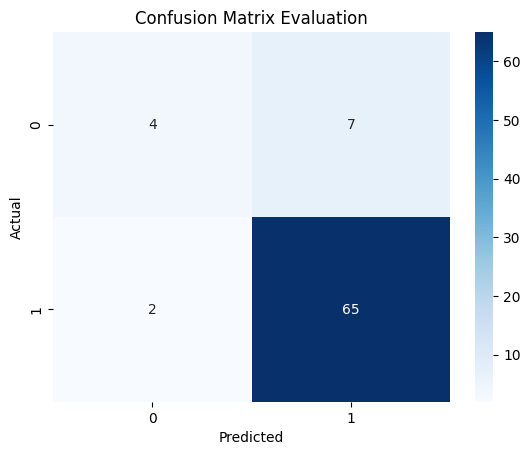

Confusion Matrix:
[[ 4  7]
 [ 2 65]]


In [66]:
#evaluate using confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Evaluation')
plt.show()
print("Confusion Matrix:")
print(conf_matrix)

- True Positives: 65 instances were correctly predicted as positive.
- False Negatives: 2 instances were incorrectly predicted as negative.
- False Positives: 7 instances were incorrectly predicted as positive.
- True Negatives: 4 instances were correctly predicted as negative.

Based on this confusion matrix:

Accuracy:(65 + 4) / (65 + 4 + 7 + 2) = 0.875

Precision: 65 / (65 + 7) = 0.901

Recall: 65 / (65 + 2) = 0.970, excellent meaning it can identify actual positive outputs

F1-score: 2 * (0.901 * 0.970) / (0.901 + 0.970) = 0.94


##*Hypothesis testing*

Question1:
- How do demographic factors such as age, gender, and marital status influence customer feedback?
-----------------

Hypothesis:

H0: There is no significant difference in customer feedback based on age.

H1: There is a significant difference in customer feedback based on age.

------------------

Question2:
- Does the customer's monthly income significantly impact the likelihood of giving positive feedback?

Hypothesis:

H0: There is no association between monthly income and customer feedback.

H1: There is an association between monthly income and customer feedback.

--------------------

Question3:
- Can geographic factors like location help predict customer feedback?

Hypothesis:

H0: There is no correlation between geographic location(lat, lon) and customer feedback.

H1: There is a correlation between geographic location(lat, lon) and customer feedback.

----------------------


In [67]:
data

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,1
1,24,Female,Single,Student,Below Rs10000,Graduate,3,12.9770,77.5773,1
2,22,Male,Single,Student,Below Rs10000,Post Graduate,3,12.9551,77.6593,0
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,1
4,22,Male,Single,Student,Below Rs10000,Post Graduate,4,12.9850,77.5533,1
...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,1
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,1
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,1
386,23,Male,Single,Student,Below Rs10000,Post Graduate,2,12.9770,77.5773,1


In [68]:
#For Question1, we will perform a T-Test for Age vs. Feedback. Begin by importing ttest_ind from scipy.stats
#If the p value ends up being <0.05, then we reject the null hypothesis

from scipy.stats import ttest_ind

#divide the feedback data accordingly into positive and negative
positive_feedback = data[data['Feedback'] == 1]['Age']
negative_feedback = data[data['Feedback'] == 0]['Age']

#perform the t-test
t_statistic, p_value = ttest_ind(positive_feedback, negative_feedback)

print("T-statistic:", t_statistic)
print("P-value:", p_value)


T-statistic: -3.9721938532988363
P-value: 8.496752350536562e-05


In [69]:
# Question2 , we will perform a Chi-Square Test for Monthly Income  vs. Feedback. Begin by importing chi2_contingency from scipy.stats
#If the p value ends up being <0.05, then we reject the null hypothesis

from scipy.stats import chi2_contingency

#crosstabulation of monthly income and feedback
contingency_table = pd.crosstab(data['Monthly Income'], data['Feedback'])

#perform the chi-square test
chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2_statistic)
print("P-value:", p_value)

Chi-square statistic: 28.957621793105385
P-value: 7.973884076388504e-06


In [70]:
#Question3, we will be doing a Pearson Correlation Test for Latitude/Longitude vs. Feedback. Start by importing pearsonr from scipy.stats
#If the p value ends up being <0.05, then we reject the null hypothesis

from scipy.stats import pearsonr

#perform the pearson correlation test
correlation, p_value = pearsonr(data['latitude'], data['Feedback'])

print("Pearson correlation coefficient:", correlation)
print("P-value:", p_value)

Pearson correlation coefficient: -0.12893881048773417
P-value: 0.011014899841930631
